In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
type(model)

sklearn.linear_model._base.LinearRegression

In [4]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('tasico_Private_Room.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0,https://www.airbnb.com/rooms/35644,2024-09-05,This renovated 1885 house has fantastic views ...,https://www.airbnb.com/users/show/153268,2010-06-27,within an hour,100%,98%,t,...,4.82,4.96,4.96,4.81,3.0,2.0,0.0,0.0,1.78,2
1,5,https://www.airbnb.com/rooms/268482,2024-09-05,"Including cooked breakfast, private ensuite, f...",https://www.airbnb.com/users/show/1406692,2011-11-14,within an hour,100%,100%,f,...,5.00,5.00,5.00,5.00,7.0,0.0,0.0,0.0,0.06,2


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

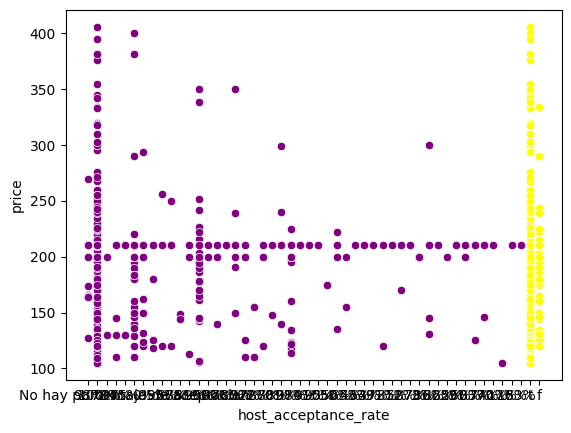

In [5]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [6]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [7]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No hay porcentaje de aceptacion", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [8]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.05937439]),
 'rank_': 1,
 'singular_': array([10.10926632]),
 'intercept_': np.float64(195.6264068965924)}

In [9]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([196.6645938 , 196.68578129, 196.45271892, 196.62221882,
       196.42093769, 195.6264069 , 195.6264069 , 196.68578129,
       196.68578129, 195.6264069 , 196.42093769, 196.68578129,
       196.6645938 , 196.6645938 , 195.6264069 , 196.68578129,
       196.68578129, 195.6264069 , 196.63281257, 196.68578129,
       196.68578129, 196.68578129, 196.68578129, 196.61162508,
       195.6264069 , 195.6264069 , 196.68578129, 196.33618774,
       196.52687513, 196.68578129, 195.6264069 , 196.68578129,
       196.68578129, 195.6264069 , 195.6264069 , 195.6264069 ,
       196.68578129, 196.68578129, 195.6264069 , 196.68578129,
       196.68578129, 196.68578129, 196.68578129, 196.68578129,
       196.6645938 , 196.48450015, 196.67518754, 195.6264069 ,
       195.6264069 , 196.21965655, 195.6264069 , 196.68578129,
       196.64340631, 196.33618774, 196.43153143, 196.68578129,
       196.67518754, 196.68578129, 196.6645938 , 196.48450015,
       196.47390641, 196.68578129, 195.6264069 , 196.68

In [10]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,196.664594,0,https://www.airbnb.com/rooms/35644,2024-09-05,This renovated 1885 house has fantastic views ...,https://www.airbnb.com/users/show/153268,2010-06-27,within an hour,100%,0.98,...,4.82,4.96,4.96,4.81,3.00,2.0,0.0,0.0,1.78,2
1,196.685781,5,https://www.airbnb.com/rooms/268482,2024-09-05,"Including cooked breakfast, private ensuite, f...",https://www.airbnb.com/users/show/1406692,2011-11-14,within an hour,100%,1.00,...,5.00,5.00,5.00,5.00,7.00,0.0,0.0,0.0,0.06,2
2,196.452719,7,https://www.airbnb.com/rooms/292399,2024-09-05,I am 20 mins from the stunning experience of M...,https://www.airbnb.com/users/show/1513972,2011-12-17,within an hour,100%,0.78,...,4.91,4.97,4.96,4.92,1.00,0.0,0.0,0.0,1.56,2
3,196.622219,8,https://www.airbnb.com/rooms/292447,2024-09-05,A compact studio in the back garden. A heavily...,https://www.airbnb.com/users/show/1514295,2011-12-18,within an hour,100%,0.94,...,4.91,4.97,4.96,4.92,1.00,0.0,0.0,0.0,1.03,2
4,196.420938,10,https://www.airbnb.com/rooms/401176,2024-09-05,Este airbnb no cuenta con una descripcion deta...,https://www.airbnb.com/users/show/2002482,2012-03-25,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.75,...,4.98,4.95,4.95,4.92,1.00,0.0,0.0,0.0,0.67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,196.685781,6190,https://www.airbnb.com/rooms/1223459111907416266,2024-09-05,Samuel Crisp started life as a sawyer in rural...,https://www.airbnb.com/users/show/4501536,2012-12-27,within an hour,100%,1.00,...,4.90,5.00,5.00,4.90,2.36,6.0,0.0,0.0,1.50,2
713,196.685781,6191,https://www.airbnb.com/rooms/1223468671243086439,2024-09-05,"Hettie Crisp, Basil’s elder daughter, was Juli...",https://www.airbnb.com/users/show/4501536,2012-12-27,within an hour,100%,1.00,...,4.90,5.00,5.00,4.90,2.36,6.0,0.0,0.0,1.50,2
714,195.626407,6195,https://www.airbnb.com/rooms/1225567975214313885,2024-09-05,180 degree views of the entire NE of Tasmania....,https://www.airbnb.com/users/show/559575975,2024-01-31,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.00,...,4.90,5.00,5.00,4.90,2.00,0.0,0.0,0.0,1.50,2
715,196.473906,6196,https://www.airbnb.com/rooms/1225591908639206658,2024-09-05,Queen bed room and you will have your own deck...,https://www.airbnb.com/users/show/459177456,2022-05-15,within an hour,100%,0.80,...,5.00,5.00,5.00,5.00,2.00,0.0,0.0,0.0,1.00,2


In [11]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

7.772272314210404e-05

In [12]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.008816049179882338)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

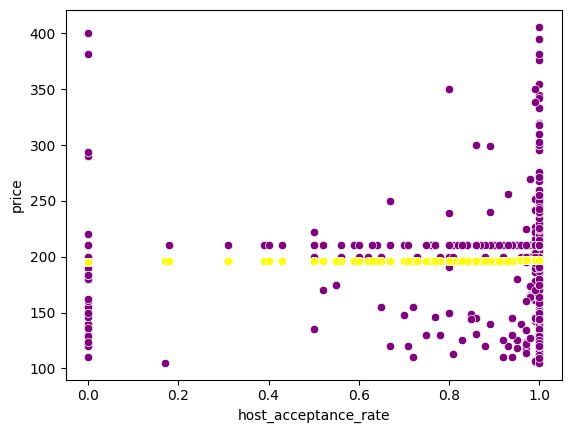

In [13]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [14]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_14572\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [15]:
df['room_type'] = 1

In [16]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

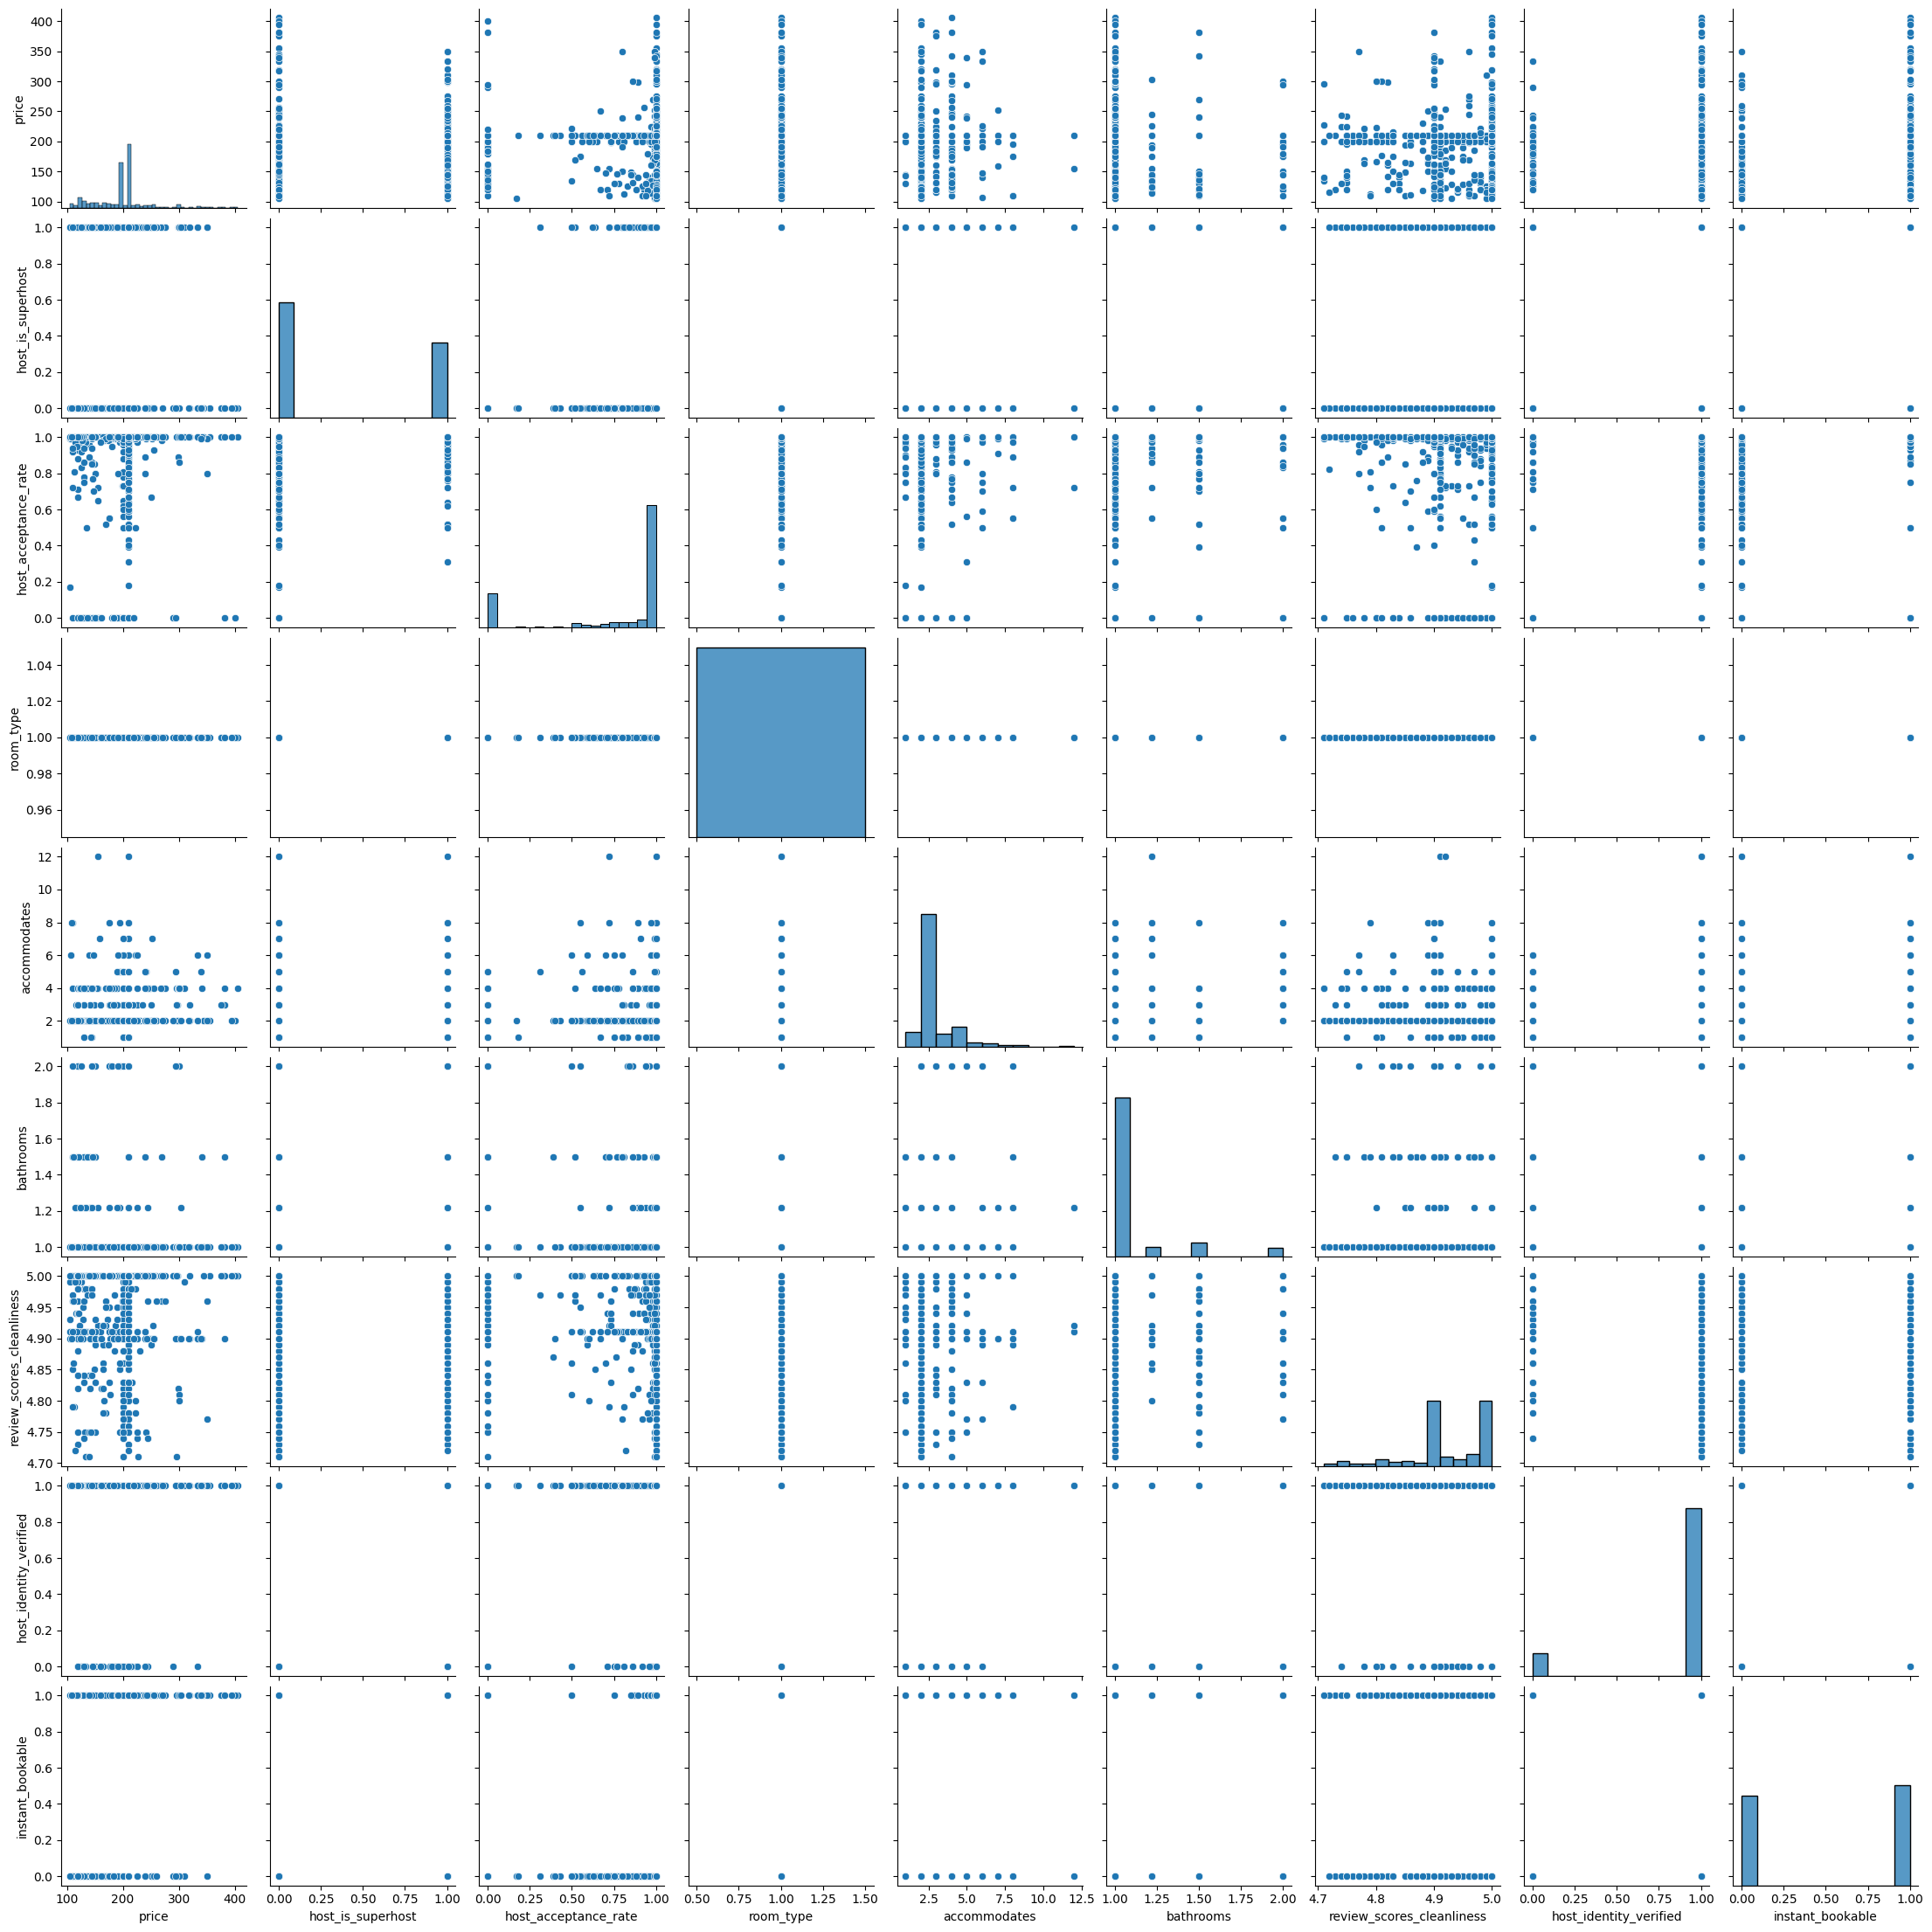

In [17]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [18]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,-0.016104,0.008816,NaN,0.034991,-0.042159,0.022955,0.019713,0.104225
host_is_superhost,-0.016104,1.000000,0.402344,NaN,-0.041988,0.097216,0.027555,0.194070,0.070930
host_acceptance_rate,0.008816,0.402344,1.000000,NaN,0.034815,0.052300,-0.031042,0.189182,0.262200
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.034991,-0.041988,0.034815,NaN,1.000000,0.113052,-0.069588,0.001625,0.075123
bathrooms,-0.042159,0.097216,0.052300,NaN,0.113052,1.000000,-0.043794,0.024433,-0.057234
review_scores_cleanliness,0.022955,0.027555,-0.031042,NaN,-0.069588,-0.043794,1.000000,-0.036412,-0.052445
host_identity_verified,0.019713,0.194070,0.189182,NaN,0.001625,0.024433,-0.036412,1.000000,0.068755
instant_bookable,0.104225,0.070930,0.262200,NaN,0.075123,-0.057234,-0.052445,0.068755,1.000000


In [19]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.016104,0.008816,NaN,0.034991,0.042159,0.022955,0.019713,0.104225
host_is_superhost,0.016104,1.000000,0.402344,NaN,0.041988,0.097216,0.027555,0.194070,0.070930
host_acceptance_rate,0.008816,0.402344,1.000000,NaN,0.034815,0.052300,0.031042,0.189182,0.262200
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.034991,0.041988,0.034815,NaN,1.000000,0.113052,0.069588,0.001625,0.075123
bathrooms,0.042159,0.097216,0.052300,NaN,0.113052,1.000000,0.043794,0.024433,0.057234
review_scores_cleanliness,0.022955,0.027555,0.031042,NaN,0.069588,0.043794,1.000000,0.036412,0.052445
host_identity_verified,0.019713,0.194070,0.189182,NaN,0.001625,0.024433,0.036412,1.000000,0.068755
instant_bookable,0.104225,0.070930,0.262200,NaN,0.075123,0.057234,0.052445,0.068755,1.000000


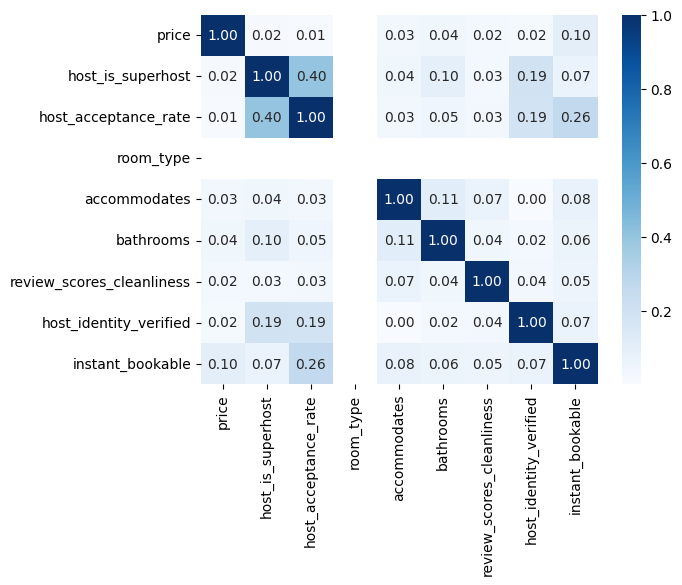

In [20]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

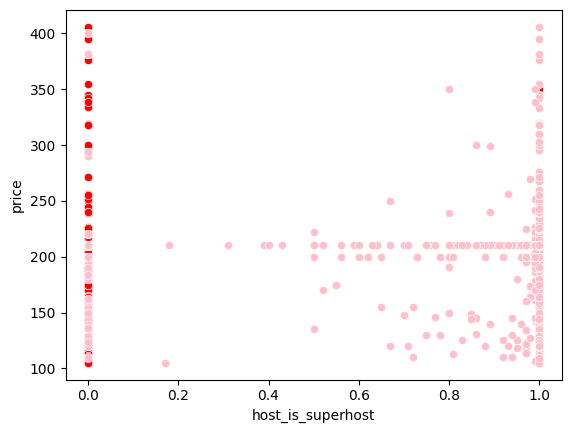

In [21]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [22]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [23]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.49464339]),
 'rank_': 1,
 'singular_': array([13.08815726]),
 'intercept_': np.float64(197.03619815668202)}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00025932355830604603

In [26]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([195.54155477, 197.03619816, 197.03619816, 197.03619816,
       197.03619816, 197.03619816, 197.03619816, 195.54155477,
       197.03619816, 197.03619816, 197.03619816, 197.03619816,
       195.54155477, 195.54155477, 197.03619816, 197.03619816,
       197.03619816, 197.03619816, 195.54155477, 195.54155477,
       195.54155477, 197.03619816, 195.54155477, 195.54155477,
       197.03619816, 197.03619816, 195.54155477, 197.03619816,
       195.54155477, 195.54155477, 197.03619816, 195.54155477,
       195.54155477, 197.03619816, 197.03619816, 197.03619816,
       197.03619816, 197.03619816, 197.03619816, 197.03619816,
       197.03619816, 197.03619816, 195.54155477, 195.54155477,
       195.54155477, 197.03619816, 195.54155477, 197.03619816,
       197.03619816, 197.03619816, 197.03619816, 195.54155477,
       195.54155477, 197.03619816, 195.54155477, 197.03619816,
       195.54155477, 197.03619816, 195.54155477, 195.54155477,
       197.03619816, 195.54155477, 197.03619816, 195.54

In [27]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,195.541555,200.00,1,0.98,1,2.0,1.00,4.82,1,0
1,197.036198,298.00,0,1.00,1,2.0,1.00,5.00,1,1
2,197.036198,130.00,0,0.78,1,4.0,1.00,4.91,1,0
3,197.036198,210.09,0,0.94,1,2.0,1.22,4.91,1,0
4,197.036198,130.00,0,0.75,1,1.0,1.00,4.98,1,0
...,...,...,...,...,...,...,...,...,...,...
712,195.541555,255.00,1,1.00,1,2.0,1.00,4.90,1,1
713,195.541555,255.00,1,1.00,1,2.0,1.00,4.90,1,1
714,197.036198,162.00,0,0.00,1,2.0,1.00,4.90,1,0
715,197.036198,210.09,0,0.80,1,2.0,1.50,5.00,1,0


In [28]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00025932355830604603

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.016103526269300335)

<Axes: xlabel='host_is_superhost', ylabel='price'>

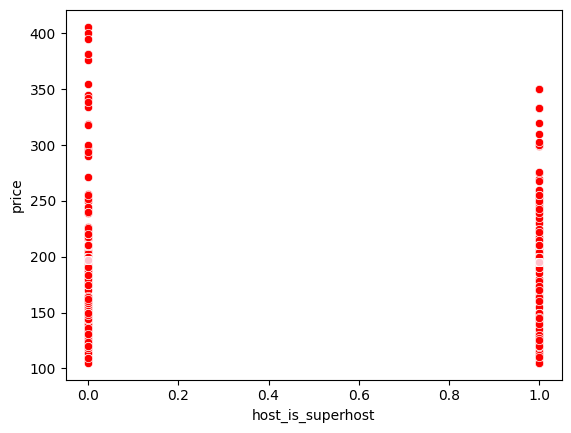

In [30]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

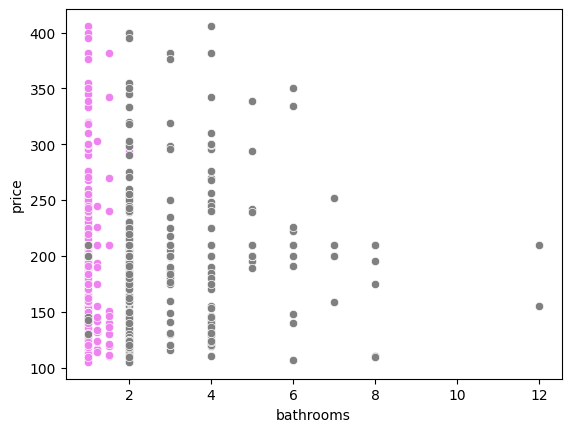

In [31]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [32]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [33]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-8.06186213]),
 'rank_': 1,
 'singular_': array([6.35261046]),
 'intercept_': np.float64(205.23560338397007)}

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0017773991896773422

In [36]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([197.17374125, 197.17374125, 197.17374125, 195.40013159,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 193.14281019, 197.17374125, 197.17374125,
       193.14281019, 193.14281019, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 193.14281019,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 195.40013159,
       197.17374125, 193.14281019, 197.17374125, 195.40013159,
       197.17374125, 193.14281019, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 197.17374125,
       197.17374125, 197.17374125, 193.14281019, 197.17374125,
       197.17374125, 197.17374125, 197.17374125, 197.17

In [37]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

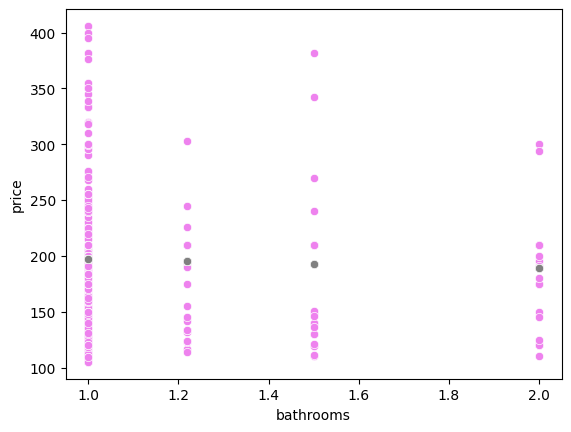

In [38]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [39]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0017773991896773422

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04215921239393998)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

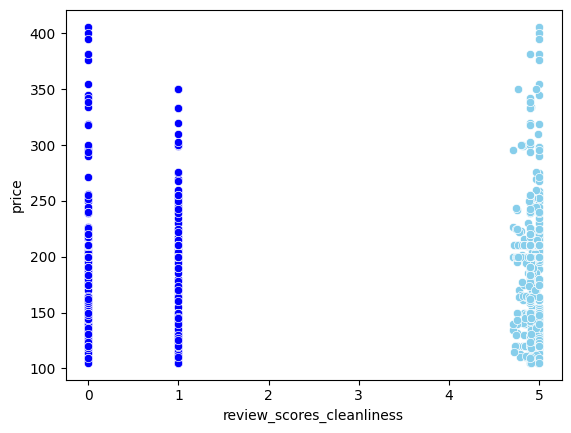

In [41]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [42]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [43]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([14.84303264]),
 'rank_': 1,
 'singular_': array([1.87864458]),
 'intercept_': np.float64(123.32662662417692)}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0005269195634877155

In [46]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([194.87004393, 197.5417898 , 196.20591686, 196.20591686,
       197.24492915, 194.57318327, 193.83103164, 197.5417898 ,
       193.23731034, 195.16690458, 196.20591686, 194.42475295,
       195.01847425, 194.7216136 , 193.83103164, 196.20591686,
       196.05748654, 195.01847425, 196.50277752, 194.7216136 ,
       193.83103164, 196.20591686, 196.79963817, 197.24492915,
       196.20591686, 195.46376523, 197.5417898 , 197.5417898 ,
       195.31533491, 197.39335947, 196.9480685 , 196.05748654,
       197.5417898 , 197.39335947, 196.35434719, 196.20591686,
       196.20591686, 197.24492915, 197.5417898 , 196.20591686,
       195.90905621, 196.05748654, 196.50277752, 195.31533491,
       196.9480685 , 196.20591686, 194.87004393, 197.5417898 ,
       196.35434719, 196.20591686, 193.23731034, 197.09649882,
       194.7216136 , 197.09649882, 195.61219556, 196.05748654,
       194.57318327, 197.09649882, 194.27632262, 194.42475295,
       196.20591686, 194.87004393, 196.20591686, 197.39

In [47]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

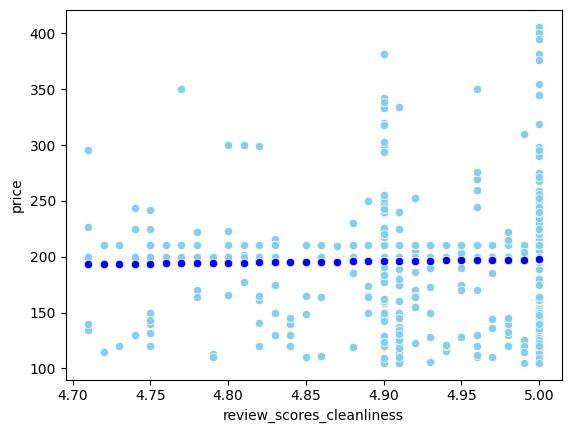

In [48]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [49]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0005269195634877155

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.02295472856488866)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

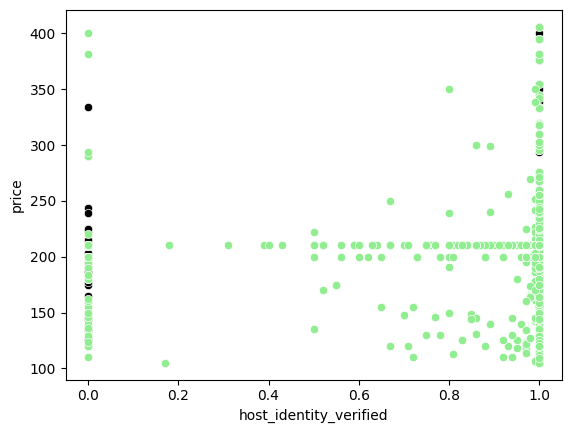

In [51]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [52]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [53]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [54]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.79526396]),
 'rank_': 1,
 'singular_': array([8.56690789]),
 'intercept_': np.float64(193.974578313253)}

In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0003886007526406887

In [56]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 193.97457831, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 193.97457831, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 193.97457831, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 193.97457831,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       193.97457831, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 196.76984227, 193.97457831,
       196.76984227, 196.76984227, 196.76984227, 196.76984227,
       196.76984227, 196.76984227, 193.97457831, 196.76

In [57]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,196.769842,194.870044,197.173741,195.541555,200.00,1,0.98,1,2.0,1.00,4.82,1,0
1,196.769842,197.541790,197.173741,197.036198,298.00,0,1.00,1,2.0,1.00,5.00,1,1
2,196.769842,196.205917,197.173741,197.036198,130.00,0,0.78,1,4.0,1.00,4.91,1,0
3,196.769842,196.205917,195.400132,197.036198,210.09,0,0.94,1,2.0,1.22,4.91,1,0
4,196.769842,197.244929,197.173741,197.036198,130.00,0,0.75,1,1.0,1.00,4.98,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,196.769842,196.057487,197.173741,195.541555,255.00,1,1.00,1,2.0,1.00,4.90,1,1
713,196.769842,196.057487,197.173741,195.541555,255.00,1,1.00,1,2.0,1.00,4.90,1,1
714,196.769842,196.057487,197.173741,197.036198,162.00,0,0.00,1,2.0,1.00,4.90,1,0
715,196.769842,197.541790,193.142810,197.036198,210.09,0,0.80,1,2.0,1.50,5.00,1,0


<Axes: xlabel='host_identity_verified', ylabel='price'>

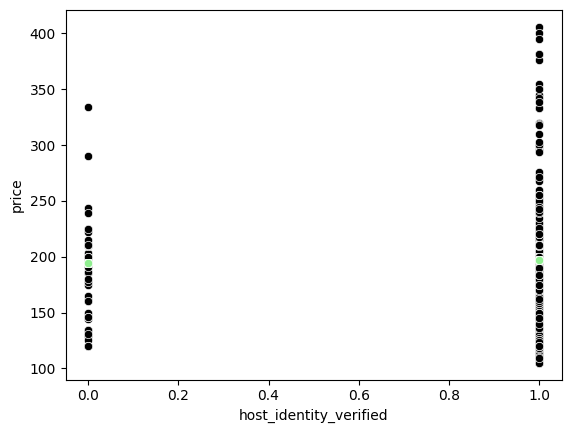

In [58]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [59]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0003886007526406887

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.019712959002663417)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

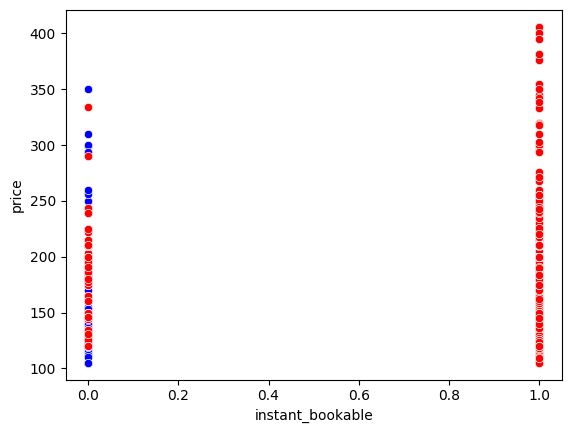

In [61]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [62]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [63]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [64]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.47218123]),
 'rank_': 1,
 'singular_': array([13.36652076]),
 'intercept_': np.float64(191.43934911242604)}

In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.010862919104767887

In [66]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([191.43934911, 200.91153034, 191.43934911, 191.43934911,
       191.43934911, 191.43934911, 191.43934911, 200.91153034,
       200.91153034, 200.91153034, 191.43934911, 200.91153034,
       200.91153034, 200.91153034, 191.43934911, 200.91153034,
       200.91153034, 191.43934911, 191.43934911, 200.91153034,
       200.91153034, 200.91153034, 200.91153034, 191.43934911,
       191.43934911, 191.43934911, 200.91153034, 191.43934911,
       200.91153034, 191.43934911, 191.43934911, 200.91153034,
       200.91153034, 191.43934911, 200.91153034, 200.91153034,
       200.91153034, 191.43934911, 200.91153034, 200.91153034,
       200.91153034, 191.43934911, 200.91153034, 191.43934911,
       191.43934911, 191.43934911, 200.91153034, 191.43934911,
       191.43934911, 191.43934911, 200.91153034, 200.91153034,
       191.43934911, 191.43934911, 191.43934911, 191.43934911,
       200.91153034, 191.43934911, 200.91153034, 191.43934911,
       191.43934911, 200.91153034, 191.43934911, 191.43

In [67]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,191.439349,196.769842,194.870044,197.173741,195.541555,200.00,1,0.98,1,2.0,1.00,4.82,1,0
1,200.911530,196.769842,197.541790,197.173741,197.036198,298.00,0,1.00,1,2.0,1.00,5.00,1,1
2,191.439349,196.769842,196.205917,197.173741,197.036198,130.00,0,0.78,1,4.0,1.00,4.91,1,0
3,191.439349,196.769842,196.205917,195.400132,197.036198,210.09,0,0.94,1,2.0,1.22,4.91,1,0
4,191.439349,196.769842,197.244929,197.173741,197.036198,130.00,0,0.75,1,1.0,1.00,4.98,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,200.911530,196.769842,196.057487,197.173741,195.541555,255.00,1,1.00,1,2.0,1.00,4.90,1,1
713,200.911530,196.769842,196.057487,197.173741,195.541555,255.00,1,1.00,1,2.0,1.00,4.90,1,1
714,191.439349,196.769842,196.057487,197.173741,197.036198,162.00,0,0.00,1,2.0,1.00,4.90,1,0
715,191.439349,196.769842,197.541790,193.142810,197.036198,210.09,0,0.80,1,2.0,1.50,5.00,1,0


<Axes: xlabel='instant_bookable', ylabel='price'>

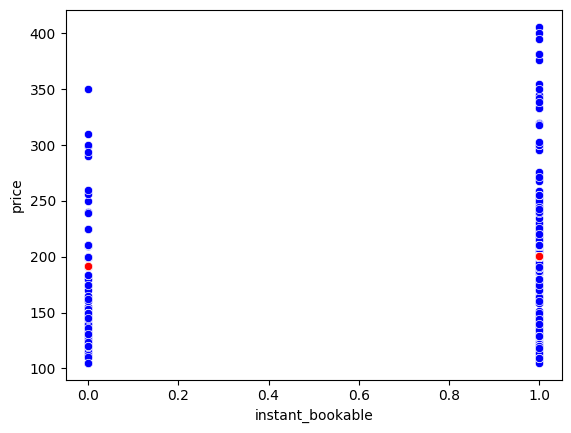

In [68]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [69]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.010862919104767887

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.10422532851839753)